# **通过Logistic Regression预测Titanic乘客是否能在事故中生还**

1. [导入工具库和数据](#t1.)
2. [缺失数据处理](#t2.)
    * 2.1. [age](#t2.1.)
    * 2.2. [cabin](#t2.2.)
    * 2.3. [embarked](#t2.3.)
    * 2.4. [fare](#t2.4.)
    * 2.5. [其他调整](#t2.5.)
        * 2.5.1 [其它特征的处理](#t2.5.1.)
3. [数据分析](#t3.)
4. [Logistic Regression](#t4.)

# 1. 导入工具库和数据

In [1]:
import numpy as np 
import pandas as pd 

from sklearn import preprocessing
import matplotlib.pyplot as plt 
plt.rc("font", size=14)
import seaborn as sns
sns.set(style="white") #设置seaborn画图的背景为白色
sns.set(style="whitegrid", color_codes=True)

In [2]:
# 将数据读入 DataFrame
df = pd.read_csv("./titanic_data.csv")

# 预览数据
df.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked
0,1.0,1.0,"Allen, Miss. Elisabeth Walton",female,29.0000,0.0,0.0,24160,211.3375,B5,S
1,1.0,1.0,"Allison, Master. Hudson Trevor",male,0.9167,1.0,2.0,113781,151.5500,C22 C26,S
2,1.0,0.0,"Allison, Miss. Helen Loraine",female,2.0000,1.0,2.0,113781,151.5500,C22 C26,S
3,1.0,0.0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1.0,2.0,113781,151.5500,C22 C26,S
4,1.0,0.0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1.0,2.0,113781,151.5500,C22 C26,S


In [3]:
data = df.copy()

# 2. 缺失数据处理

In [4]:
# 查看数据集中各个特征缺失的情况
df.isnull().sum()

pclass         1
survived       1
name           1
sex            1
age          264
sibsp          1
parch          1
ticket         1
fare           2
cabin       1015
embarked       3
dtype: int64

## 2.1.    age

In [5]:
# "age" 缺失的百分比 
print('"age" 缺失的百分比  %.2f%%' %((df['age'].isnull().sum()/df.shape[0])*100))

"age" 缺失的百分比  20.15%


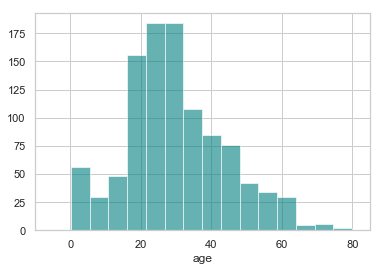

In [6]:
ax = df["age"].hist(bins=15, color='teal', alpha=0.6)
ax.set(xlabel='age')
plt.xlim(-10,85)
plt.show()

In [7]:
# age的均值
print('The mean of "Age" is %.2f' %(df["age"].mean(skipna=True)))
# age的中间值
print('The median of "Age" is %.2f' %(df["age"].median(skipna=True)))

The mean of "Age" is 29.88
The median of "Age" is 28.00


In [8]:
data["age"].fillna(df["age"].median(skipna=True), inplace=True)

## 2.2. cabin

In [9]:
# cabin缺失的百分比
print('"Cabin" 缺失的百分比 %.2f%%' %((df['cabin'].isnull().sum()/df.shape[0])*100))

"Cabin" 缺失的百分比 77.48%


In [10]:
data.drop('cabin', axis=1, inplace=True)

## 2.3. embarked

In [11]:
# embarked的缺失率
print('"Embarked" 缺失的百分比 %.2f%%' %((df['embarked'].isnull().sum()/df.shape[0])*100))

"Embarked" 缺失的百分比 0.23%


embarked分组 (C = Cherbourg, Q = Queenstown, S = Southampton):
S    914
C    270
Q    123
Name: embarked, dtype: int64


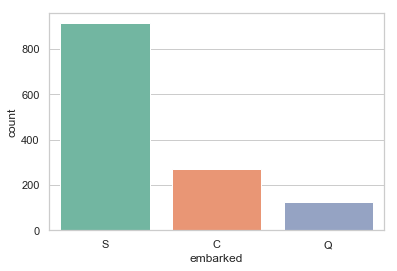

In [12]:
print('embarked分组 (C = Cherbourg, Q = Queenstown, S = Southampton):')
print(df['embarked'].value_counts())
sns.countplot(x='embarked', data=df, palette='Set2')
plt.show()

In [13]:
print('embarked的众数为 %s.' %df['embarked'].value_counts().idxmax())

embarked的众数为 S.


In [14]:
data["embarked"].fillna(df['embarked'].value_counts().idxmax(), inplace=True)

## 2.4. fare

由于票价跟仓位有对应关系，所以票价的缺失值由同船仓等级的平均票价来填充。

In [15]:
meanFare = data[['pclass','fare']].groupby('pclass').mean()['fare']
data.loc[data[data['fare'].isnull()].index,'fare'] = data.loc[data[data['fare'].isnull()].index,'pclass'].map(meanFare)

## 2.5. 其他调整

In [16]:
# 确认数据是否还包含缺失数据
data.isnull().sum()

pclass      1
survived    1
name        1
sex         1
age         0
sibsp       1
parch       1
ticket      1
fare        1
embarked    0
dtype: int64

In [17]:
#找出属性name中存在缺失值的行
print(data.name.isnull().value_counts())
data[data.name.isnull()]

False    1309
True        1
Name: name, dtype: int64


,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,embarked
1309,NaN,NaN,NaN,NaN,28.0,NaN,NaN,NaN,NaN,S


由于上面的行中多数值都缺失了，所以将这一行删除

In [18]:
data = data.drop(1309)

In [19]:
# 确认数据是否还包含缺失数据
data.isnull().sum()

pclass      0
survived    0
name        0
sex         0
age         0
sibsp       0
parch       0
ticket      0
fare        0
embarked    0
dtype: int64

### 查看年龄在调整前后的分布

E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")
E:\Anaconda3\lib\site-packages\matplotlib\axes\_axes.py:6510: MatplotlibDeprecationWarning: 
The 'normed' kwarg was deprecated in Matplotlib 2.1 and will be removed in 3.1. Use 'density' instead.
  alternative="'density'", removal="3.1")


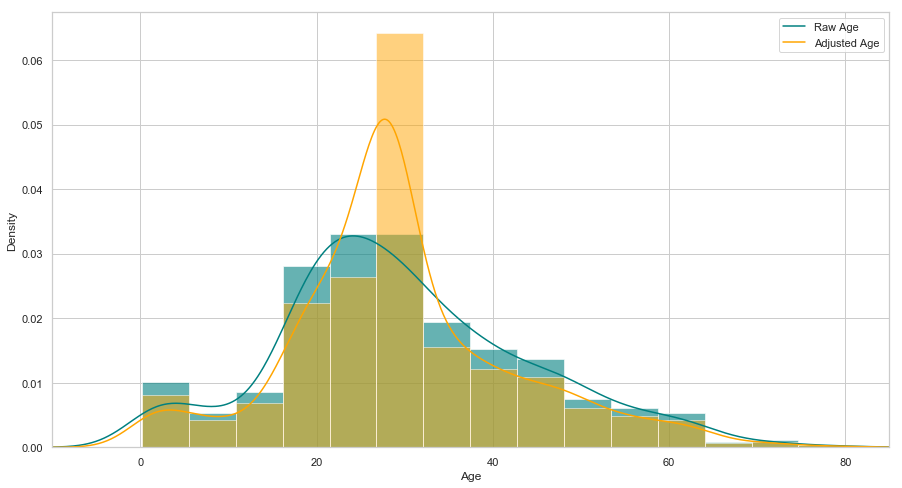

In [20]:
plt.figure(figsize=(15,8))
ax = df["age"].hist(bins=15, normed=True, stacked=True, color='teal', alpha=0.6)
df["age"].plot(kind='density', color='teal')
ax = data["age"].hist(bins=15, normed=True, stacked=True, color='orange', alpha=0.5)
data["age"].plot(kind='density', color='orange')
ax.legend(['Raw Age', 'Adjusted Age'])
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<a id="t2.5.1."></a>
## 2.5.1. 其它特征的处理

In [21]:
## 创建一个新的变量'TravelAlone'记录是否独自成行, 丢弃“sibsp” (一同登船的兄弟姐妹或者配偶数量)与“parch”(一同登船的父母或子女数量)
data['TravelAlone']=np.where((data["sibsp"]+data["parch"])>0, 0, 1)
data.drop('sibsp', axis=1, inplace=True)
data.drop('parch', axis=1, inplace=True)

对类别变量(categorical variables)使用独热编码(One-Hot Encoding), 将字符串类别转换为数值

In [22]:
# 对 Embarked","Sex"进行独热编码, 丢弃 'name', 'ticket'
final =pd.get_dummies(data, columns=["embarked","sex"])
final.drop('name', axis=1, inplace=True)
final.drop('ticket', axis=1, inplace=True)

final.head()

,pclass,survived,age,fare,TravelAlone,embarked_C,embarked_Q,embarked_S,sex_female,sex_male
0,1.0,1.0,29.0000,211.3375,1,0,0,1,1,0
1,1.0,1.0,0.9167,151.5500,0,0,0,1,0,1
2,1.0,0.0,2.0000,151.5500,0,0,0,1,1,0
3,1.0,0.0,30.0000,151.5500,0,0,0,1,0,1
4,1.0,0.0,25.0000,151.5500,0,0,0,1,1,0


<a id="t3."></a>
# 3. 数据分析

<a id="t3.1."></a>
## 3.1. age

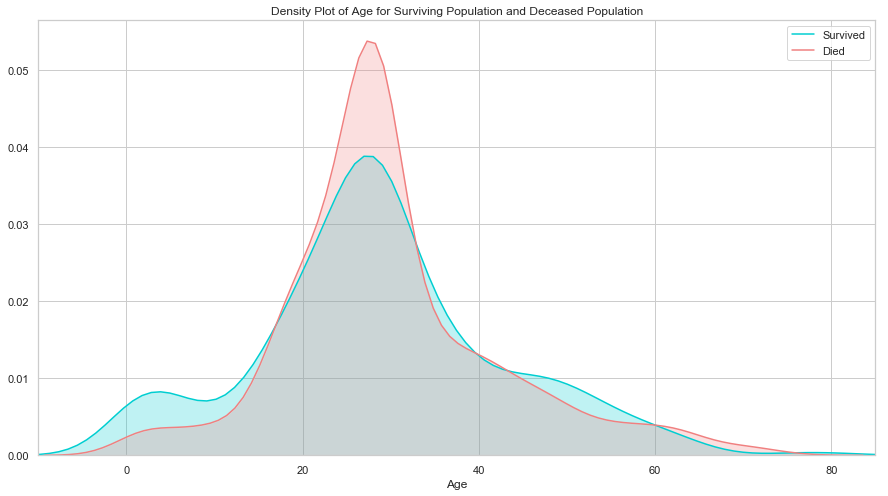

In [23]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final["age"][final.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final["age"][final.survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Age for Surviving Population and Deceased Population')
ax.set(xlabel='Age')
plt.xlim(-10,85)
plt.show()

<a id="t3.2."></a>
## 3.2. fare

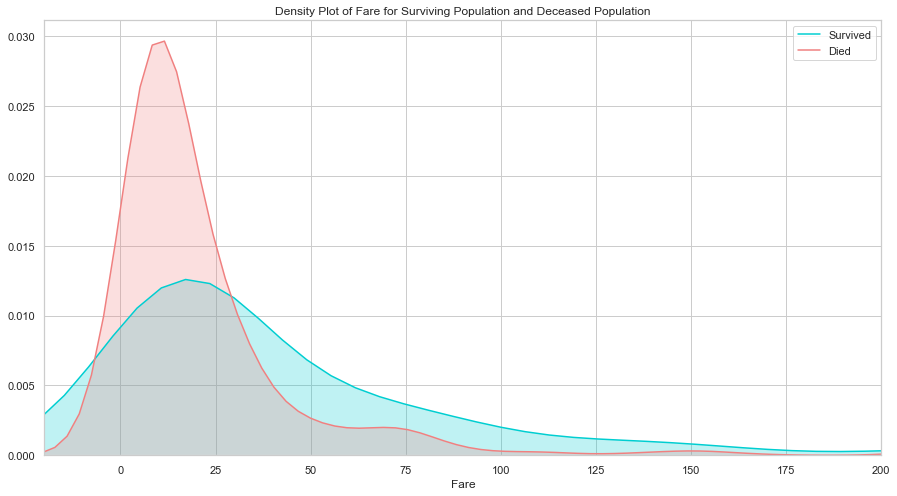

In [24]:
plt.figure(figsize=(15,8))
ax = sns.kdeplot(final["fare"][final.survived == 1], color="darkturquoise", shade=True)
sns.kdeplot(final["fare"][final.survived == 0], color="lightcoral", shade=True)
plt.legend(['Survived', 'Died'])
plt.title('Density Plot of Fare for Surviving Population and Deceased Population')
ax.set(xlabel='Fare')
plt.xlim(-20,200)
plt.show()

<a id="t3.3."></a>
## 3.3. pclass

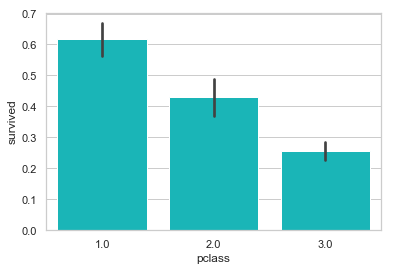

In [25]:
sns.barplot('pclass', 'survived', data=df, color="darkturquoise")
plt.show()

<a id="t3.4."></a>
## 3.4. embarked

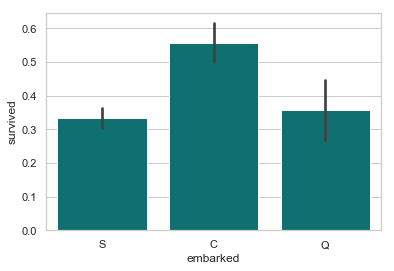

In [26]:
sns.barplot('embarked', 'survived', data=df, color="teal")
plt.show()

<a id="t3.5."></a>
## 3.5. TravelAlone

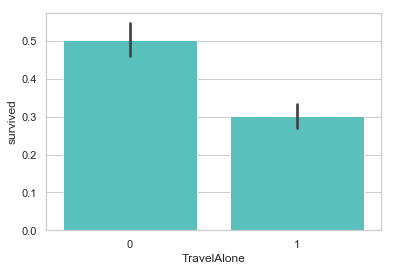

In [27]:
sns.barplot('TravelAlone', 'survived', data=final, color="mediumturquoise")
plt.show()

<a id="t3.6."></a>
## 3.6. sex

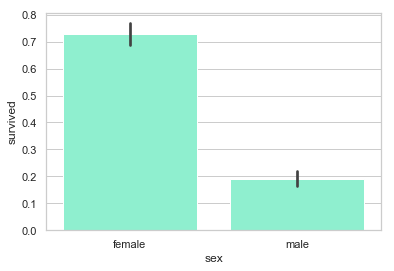

In [28]:
sns.barplot('sex', 'survived', data=df, color="aquamarine")
plt.show()

<a id="t4."></a>
# 4. 使用Logistic Regression做预测

In [29]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 使用如下特征做预测
cols = ["age","fare","TravelAlone","pclass","embarked_C","embarked_S","sex_male"] 

# 创建 X (特征) 和 y (类别标签)
X = final[cols]
y = final['survived']

# 将 X 和 y 分为两个部分
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

# 检测 logistic regression 模型的性能
# 1.训练模型,  
# 2.根据模型, 以 X_test 为输入, 生成变量 y_pred
lrg = LogisticRegression()
lrg.fit(X_train, y_train.values.reshape(-1))
y_pred = lrg.predict(X_test)
print('Train/Test split results:')
print("准确率为 %2.3f" % accuracy_score(y_test, y_pred))

Train/Test split results:
准确率为 0.836


E:\Anaconda3\lib\site-packages\sklearn\linear_model\logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


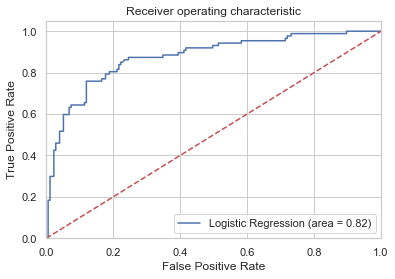

In [30]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve

auc = roc_auc_score(y_test, lrg.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, lrg.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()